In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import descartes
import csv
import pandas as pd

with open('nodos.csv') as f:
    nodos = pd.read_csv(f)
    
barrios = nodos.NOMBRE[nodos.NOMBRE.duplicated()==False].values

vecinos = {}

DEFAULT_COORDINATES  = {}

for barrio in barrios:
    nodos_barrio = nodos[nodos.NOMBRE==barrio]
    coordinates_barrio = zip(nodos_barrio.X.values, nodos_barrio.Y.values)
    poligon = Polygon(coordinates_barrio)
    
    DEFAULT_COORDINATES[barrio] = coordinates_barrio
    
DEFAULT_COLOR = {
  1:  '#8dd3c7',
  2:  '#ffffb3',
  3:  '#bebada',
  4:  '#fb8072',
  5:  '#80b1d3',
  6:  '#fdb462',
  7:  '#b3de69',
  8:  '#fccde5',
  9:  '#d9d9d9',
  10: '#bc80bd',
  11: '#ccebc5',
  12: '#ffed6f',
  13: '#b2df8a',
}

DEFAULT_BARRIOS = nodos.NOMBRE[nodos.NOMBRE.duplicated()==False].values

vecinos = {}

DEFAULT_COORDINATES  = {}

for barrio in DEFAULT_BARRIOS:
    nodos_barrio = nodos[nodos.NOMBRE==barrio]
    coordinates_barrio = zip(nodos_barrio.X.values, nodos_barrio.Y.values)
    poligon = Polygon(coordinates_barrio)
    
    DEFAULT_COORDINATES[barrio] = coordinates_barrio


def fitness(gen):
    """Returns a positive number that indicates how close the individual is to our desired solution.
    """    
    gendf = pd.DataFrame(gen)
    mad = gendf.mad()
    
    return mad.std()

# Ver Fitness.ipynb
def visualize(gen, color=DEFAULT_COLOR, barrios=DEFAULT_BARRIOS, coordinates=DEFAULT_COORDINATES, alpha=0.5):
    """Plots a solution for visual interpretation
    """
    plt.rcParams['figure.figsize'] = (20.0, 10.0)

    fig = plt.figure()
    ax = fig.add_subplot(121)
    
    # vamos de gen a barrio, dia. Como se hace?
    # sacamos el barrio, dia de la matriz de gen.
    gis = zip(barrios, coordinates.values()) 
    
    rows, columns = gen.shape

    for row in range(rows):
        for column in range(columns):
            data = gen[row, column]

            if data > 0:
                poly = coordinates[sorted(barrios)[row]]     
                ax.add_patch(descartes.PolygonPatch(Polygon(poly), fc=color[column+1], alpha=alpha))
    
    ax.axis('equal')
    
    ax2 = fig.add_subplot(122)
    gendf = pd.DataFrame(gen)
    gendf.mad().plot.bar()

    plt.show()
    
# Ver MatrizVecinos.ipynb
matriz_vecinos = pd.read_csv('adyacencia.csv', sep=';')


# Ver Genetic.ipynb
from pyevolve import G2DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Crossovers
from pyevolve import Mutators

# This function is the evaluation function, we want
# to give high score to more zero'ed chromosomes
def SUMA(chromosome):
    return sum([sum(row) for row in chromosome])

def ga(dias=13, barrios=329, generations=100, freq_stats=10, evaluation=SUMA):
    # Genome instance
    genome = G2DList.G2DList(barrios, dias)
    genome.setParams(rangemin=0, rangemax=1)

    # The evaluator function (objective function)
    genome.evaluator.set(evaluation)
    genome.crossover.set(Crossovers.G2DListCrossoverSingleHPoint)
    genome.mutator.set(Mutators.G2DListMutatorIntegerRange)

    # Genetic Algorithm Instance
    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(generations)

    # Do the evolution, with stats dump
    # frequency of 10 generations
    ga.evolve(freq_stats=freq_stats)
    return ga.bestIndividual()

def ga_to_array(solution):
    return np.asarray([row for row in solution], dtype=np.uint16)

In [2]:
# Cargar matriz de vecinos.

In [3]:
with open('lectura.csv') as f:
    lectura = pd.read_csv(f)
    
clientes = dict(zip(lectura.GIS, lectura.Clientes))
dias = dict(zip(lectura.GIS, lectura.Dia))

initial_solution = np.zeros((len(lectura.GIS), len(lectura.Dia.unique()+1)))


for index, barrio in enumerate(sorted(lectura.GIS)):
    initial_solution[index, dias[barrio]-1] = clientes[barrio]

## Antes de empezar a generar soluciones mejores que la inicial, grafiquemos el MAD y la ubicación espacial de esa solución

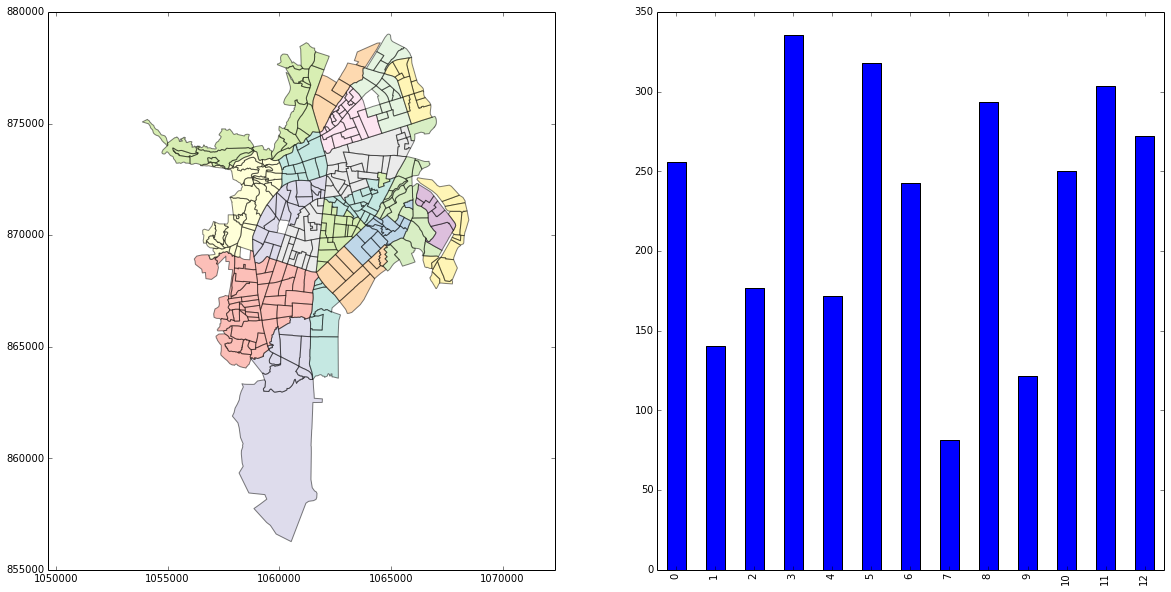

In [6]:
visualize(initial_solution)

In [16]:
%time our_solution_ga = ga(generations=100, freq_stats=10, evaluation=SUMA)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [2568.51(2237.00)/1535.70(2004.00)/2140.42(2140.43)]
Gen. 10 (10.00%): Max/Min/Avg Fitness(Raw) [2805.17(2353.00)/1922.61(2324.00)/2337.64(2337.64)]
Gen. 20 (20.00%): Max/Min/Avg Fitness(Raw) [2939.42(2462.00)/1958.63(2437.00)/2449.51(2449.51)]
Gen. 30 (30.00%): Max/Min/Avg Fitness(Raw) [3044.06(2550.00)/1974.96(2522.00)/2536.71(2536.71)]
Gen. 40 (40.00%): Max/Min/Avg Fitness(Raw) [3126.45(2627.00)/2259.00(2591.00)/2605.38(2605.38)]
Gen. 50 (50.00%): Max/Min/Avg Fitness(Raw) [3193.38(2678.00)/2151.03(2645.00)/2661.15(2661.15)]
Gen. 60 (60.00%): Max/Min/Avg Fitness(Raw) [3263.19(2735.00)/2222.30(2705.00)/2719.33(2719.32)]
Gen. 70 (70.00%): Max/Min/Avg Fitness(Raw) [3300.12(2765.00)/2229.61(2736.00)/2750.10(2750.10)]
Gen. 80 (80.00%): Max/Min/Avg Fitness(Raw) [3323.58(2789.00)/2350.27(2755.00)/2769.65(2769.65)]
Gen. 90 (90.00%): Max/Min/Avg Fitness(Raw) [3362.30(2817.00)/2285.17(2788.00)/2801.91(2801.91)]
Gen. 100 (100.00%): Max/Min/Avg Fitness(Ra

In [17]:
our_solution_ga

- GenomeBase
	Score:			 2840.000000
	Fitness:		 3389.355000

	Params:		 {'rangemax': 1, 'rangemin': 0}

	Slot [Evaluator] (Count: 1)
		Name: SUMA - Weight: 0.50
	Slot [Initializator] (Count: 1)
		Name: G2DListInitializatorInteger - Weight: 0.50
		Doc:  Integer initialization function of G2DList

   This initializator accepts the *rangemin* and *rangemax* genome parameters.
   
   
	Slot [Mutator] (Count: 1)
		Name: G2DListMutatorIntegerRange - Weight: 0.50
		Doc:  Simple integer range mutator for G2DList

   Accepts the *rangemin* and *rangemax* genome parameters, both optional.

   
	Slot [Crossover] (Count: 1)
		Name: G2DListCrossoverSingleHPoint - Weight: 0.50
		Doc:  The crossover of G2DList, Single Horizontal Point 

- G2DList
	List size:	 (329, 13)
	List:
			[1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [0] 
			[1] [0] [0] [0] [1] [1] [0] [0] [1] [1] [1] [1] [1] 
			[0] [0] [1] [0] [0] [1] [0] [1] [0] [0] [1] [1] [1] 
			[1] [1] [1] [1] [1] [0] [1] [0] [1] [1] [0] [1] [1] 
			[

In [20]:
our_solution = ga_to_array(our_solution_ga)

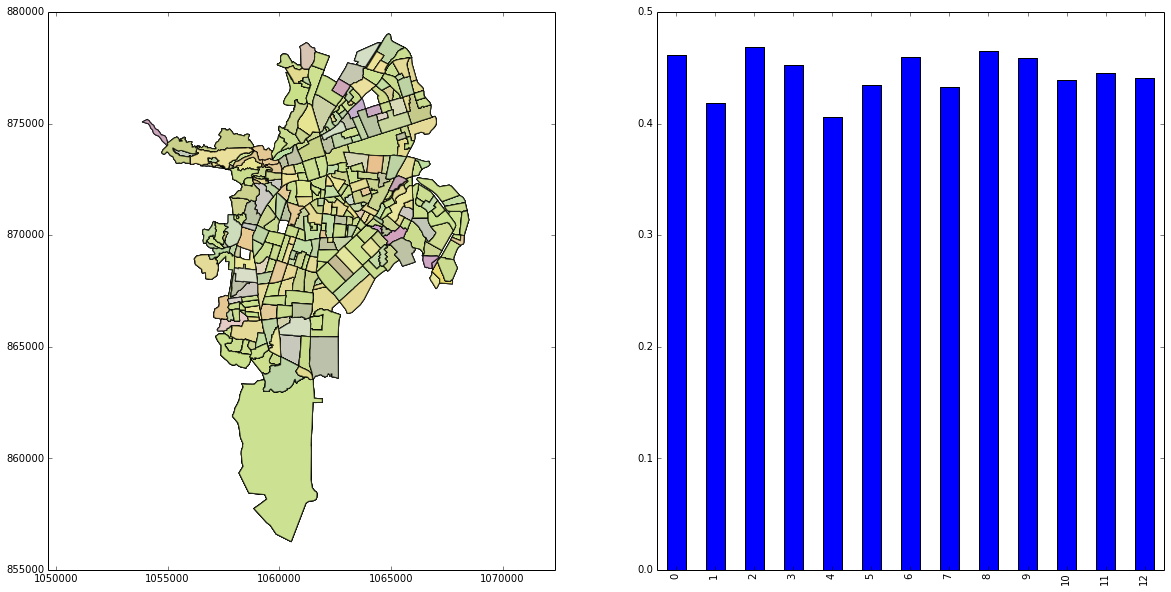

In [21]:
visualize(our_solution)